It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.

You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file.


**Will you become Earth’s savior?
Or will you obliterate life?**

*The choice is yours...*

### **Cargamos y vemos los datos**

In [470]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv("Valhalla23.csv")
x = df["Celsius"]
y = df["Valks"]

print(df.head())
print("")
print(df.isnull().sum())

   Celsius    Valks
0  61.4720 -139.740
1  70.5790 -156.600
2  -7.3013   73.269
3  71.3380 -165.420
4  43.2360  -75.835

Celsius    0
Valks      0
dtype: int64


### **En el siguiente recuadro, se creó un gráfico de dispersión de Celsius vs Valks**

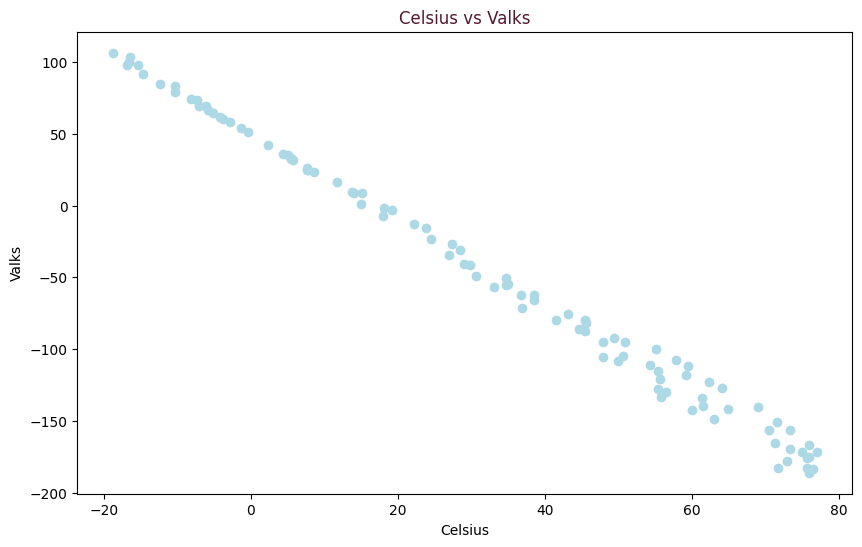

In [471]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Celsius'], data['Valks'], color='lightblue')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Celsius vs Valks', color='#541730')
plt.show()

In [472]:
# Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula
seed = 1120
np.random.seed(seed)
random.seed(seed)

In [473]:
# Dividir los datos: conjuntos de entrenamiento (40%), validación (40%) y prueba (20%).
train = df.sample(frac=0.8, random_state=seed)

df = df.drop(train.index)
test = df

validation = train.sample(frac=0.5, random_state=seed)
train = train.drop(validation.index)

len(train), len(validation), len(test)

(40, 40, 20)

In [474]:
learning_rate = 1e-4

model = SGDRegressor(
    max_iter=1_000_000,
    learning_rate='constant',
    eta0=learning_rate,
    random_state=seed
)

X_train = train.drop(columns=["Valks"])
y_train = train["Valks"]

X_validation = validation.drop(columns=["Valks"])
y_validation = validation["Valks"]

X_test = test.drop(columns=["Valks"])
y_test = test["Valks"]

Calcular el MSE para cada conjunto de datos:

In [475]:
model.fit(X_train, y_train)

mse_train = np.mean((model.predict(X_train) - y_train) ** 2)

mse_validation = np.mean((model.predict(X_validation) - y_validation) ** 2)

mse_test = np.mean((model.predict(X_test) - y_test) ** 2)

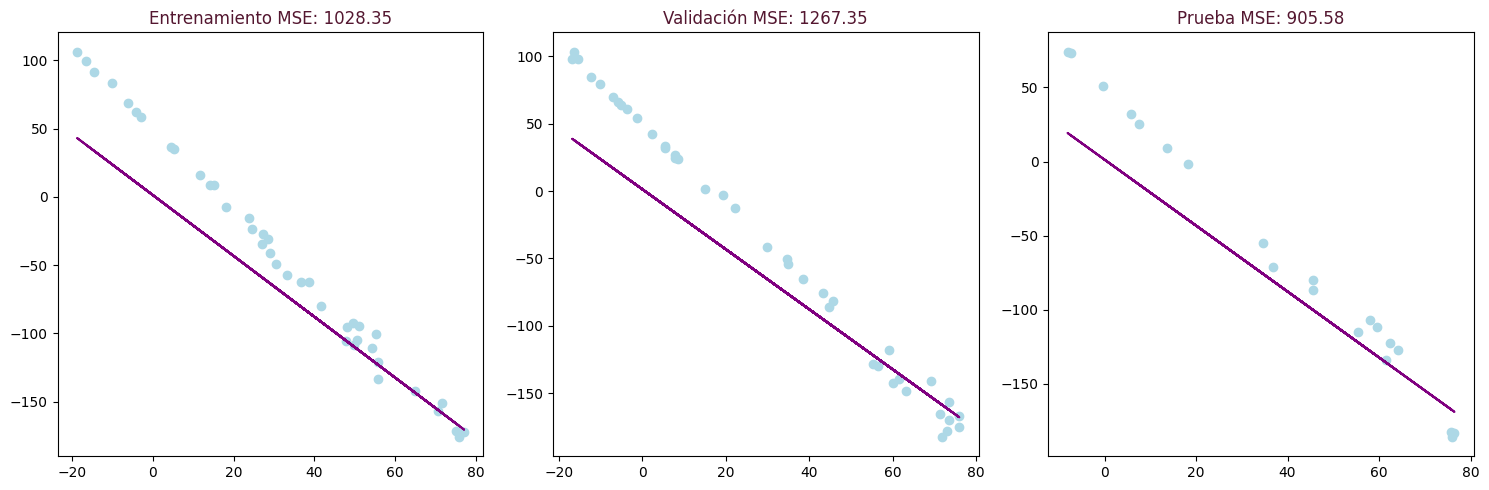

In [476]:
# Crear subparcelas: 1 fila, 3 columnas
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Subtrama del tren
axs[0].scatter(X_train, y_train, color="lightblue", label="Train")
axs[0].plot(X_train, model.predict(X_train), color="purple", label="Model")
axs[0].set_title(f"Entrenamiento MSE: {mse_train:.2f}", color='#541730')

# Subparcela de validación
axs[1].scatter(X_validation, y_validation, color="lightblue", label="Validation")
axs[1].plot(X_validation, model.predict(X_validation), color="purple", label="Model")
axs[1].set_title(f"Validación MSE: {mse_validation:.2f}", color='#541730')

# Subparcela de prueba
axs[2].scatter(X_test, y_test, color="lightblue", label="Test")
axs[2].plot(X_test, model.predict(X_test), color="purple", label="Model")
axs[2].set_title(f"Prueba MSE: {mse_test:.2f}", color='#541730')

# Ajuste la disposición para evitar solapamientos
plt.tight_layout()

# Mostrar la trama
plt.show()

Crea una lista con números entre 2 y 40:

In [477]:
def generate_subset_sizes():
    #Genera una lista de 20 tamaños de subconjunto entre 2 y 39, incluyendo siempre 2.
    numbers = list(range(3, 40))
    return [2] + sorted(random.sample(numbers, 19))

def train_and_evaluate_models(train, validation, subset_sizes, number_models=100, learning_rate=0.01, seed=42):
    # Entrena y evalúa modelos para diferentes tamaños de subconjunto.
    dict_of_models = {}

    for i in subset_sizes:
        models = []
        for _ in range(number_models):
            # Obtener un subconjunto aleatorio de los datos de entrenamiento
            train_subset = train.sample(n=i, random_state=seed)

            X_train_subset = train_subset.drop(columns=["Valks"])
            y_train_subset = train_subset["Valks"]

            model = SGDRegressor(
                max_iter=1_000_000,
                learning_rate='constant',
                eta0=learning_rate,
                random_state=seed
            )

            model.fit(X_train_subset, y_train_subset)

            # Calcular MSE para el subconjunto de entrenamiento
            mse_train = np.mean((model.predict(X_train_subset) - y_train_subset) ** 2)

            # Calcular MSE para los datos de validación
            X_validation = validation.drop(columns=["Valks"])
            y_validation = validation["Valks"]
            mse_validation = np.mean((model.predict(X_validation) - y_validation) ** 2)

            models.append((model, mse_train, mse_validation))

        dict_of_models[i] = models

    return dict_of_models

def calculate_mean_mse(dict_of_models):
    # Calcula la media del MSE (entrenamiento y validación) para cada tamaño de subconjunto.
    mean_mse = {}
    for i, models in dict_of_models.items():
        mean_mse[i] = (
            np.mean([model[1] for model in models]),
            np.mean([model[2] for model in models])
        )
    return mean_mse

# Asumiendo que 'train' y 'validation' son tus DataFrames de entrenamiento y validación
subset_sizes = generate_subset_sizes()
dict_of_models = train_and_evaluate_models(train, validation, subset_sizes)

# Calcular la media del MSE
mean_mse = calculate_mean_mse(dict_of_models)

# Ordenar las claves y extraer los valores MSE
sorted_keys = sorted(mean_mse.keys())
mse_train = [mean_mse[i][0] for i in sorted_keys]
mse_validation = [mean_mse[i][1] for i in sorted_keys]

# Imprimir resultados
print("Tamaños de subconjunto utilizados:", sorted_keys)
print("MSE de entrenamiento:", mse_train)
print("MSE de validación:", mse_validation)

# Aquí puedes agregar tu código de visualización utilizando sorted_keys, mse_train y mse_validation

Tamaños de subconjunto utilizados: [2, 3, 4, 8, 9, 10, 11, 14, 16, 17, 18, 21, 22, 23, 27, 30, 31, 33, 36, 38]
MSE de entrenamiento: [1.2056228901615496e+23, 3.956622026691074e+22, 1.7260276190637594e+26, 1.5805886447944688e+26, 7.489830812889063e+25, 1.9713682599374377e+25, 4.044054138640544e+25, 1.543089347333171e+25, 4.015170928013506e+24, 3.787447808320877e+25, 3.592658531917065e+25, 6.971576940034413e+23, 3.6675271845896985e+26, 3.959933145962517e+25, 8.88903814748729e+25, 2.682380383130604e+25, 9.295619371620566e+23, 2.4654069091295565e+26, 2.2598213729137703e+26, 3.529397549914888e+25]
MSE de validación: [1.3907901607621973e+23, 6.467914612958475e+22, 2.18150589833059e+26, 1.6621413431863462e+26, 8.37530620124357e+25, 2.425545539431425e+25, 5.219679912595379e+25, 2.321495551960843e+25, 4.897917275271222e+24, 4.908673590484153e+25, 4.091565497425373e+25, 8.139449551461904e+23, 4.0654603719780836e+26, 4.505994239958086e+25, 9.447971120679303e+25, 2.939451745577325e+25, 1.013094490

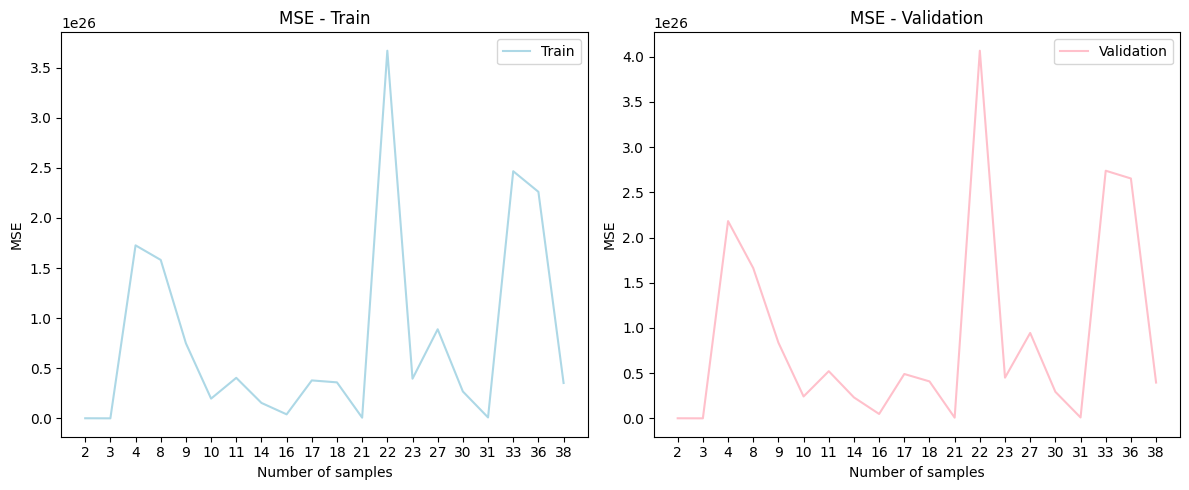

In [478]:
# Crear subparcelas: 1 fila, 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Trazar mse_train en el primer subtrazado
ax1.plot(mse_train, label="Train", color='lightblue')
ax1.set_xlabel("Number of samples")
ax1.set_ylabel("MSE")
ax1.set_title("MSE - Train")
ax1.set_xticks(range(len(mse_train)))
ax1.set_xticklabels(sorted_keys)
ax1.legend()

# Trazar mse_validation en el segundo subtrazado
ax2.plot(mse_validation, label="Validation", color='pink')
ax2.set_xlabel("Number of samples")
ax2.set_ylabel("MSE")
ax2.set_title("MSE - Validation")
ax2.set_xticks(range(len(mse_validation)))
ax2.set_xticklabels(sorted_keys)
ax2.legend()

# Ajusta el diseño para una mejor visualización
plt.tight_layout()
plt.show()

# Interpretación de los resultados


## Ajuste del Modelo

- 2 muestras: El MSE (Error Cuadrático Medio) en el conjunto de entrenamiento no es tan malo, pero en el conjunto de validación es mucho peor, lo que indica que el modelo prácticamente no ha aprendido nada.
- 38 muestras: Parece estar en un punto de equilibrio. El modelo no está sobreajustando ni subajustando. Además, tanto el MSE de entrenamiento como el de validación muestran movimientos similares.

## ¿Cómo cambia el ajuste a medida que aumenta el tamaño de la muestra?

El tamaño ideal para lograr los mejores resultados en el MSE de entrenamiento es con 2, 3, 21 o 31 muestras. Sin embargo, esto no es ideal para el conjunto de validación porque el modelo podría no generalizar bien.
El tamaño ideal para lograr los mejores resultados en el MSE de validación es con 4 muestras. Esto es mucho mejor porque el modelo puede generalizar bien y predecir mejor datos no vistos.

## ¿Cuál es el mejor tamaño para el entrenamiento del modelo?

Alrededor de 4 muestras. Como se explicó antes, este es el mejor tamaño para el conjunto de validación y permite que el modelo generalice bien.

Entrenar el modelo con el nuevo tamaño de la muestra

In [479]:
df = pd.read_csv("Valhalla23.csv")
x = df["Celsius"]
y = df["Valks"]

In [480]:
train = df.sample(frac=0.8, random_state=seed)

df = df.drop(train.index)
test = df

validation = train.sample(frac=0.5, random_state=seed)
train = train.drop(validation.index)

len(train), len(validation), len(test)

(40, 40, 20)

In [481]:
# dependiendo de la MSE de Validación, seleccionla el 4 de muestras para el entrenamiento
train = train.sample(4, random_state=seed)

In [482]:
learning_rate = 1e-4

model = SGDRegressor(
    max_iter=1_000_000,
    learning_rate='constant',
    eta0=learning_rate,
    random_state=seed
)

X_train = train.drop(columns=["Valks"])
y_train = train["Valks"]

X_validation = validation.drop(columns=["Valks"])
y_validation = validation["Valks"]

X_test = test.drop(columns=["Valks"])
y_test = test["Valks"]

In [483]:
model.fit(X_train, y_train)

mse_train = np.mean((model.predict(X_train) - y_train) ** 2)

mse_validation = np.mean((model.predict(X_validation) - y_validation) ** 2)

mse_test = np.mean((model.predict(X_test) - y_test) ** 2)

## **Análisis de Sesgo y Varianza en los Modelos de Regresión**
## Modelos con diferentes tamaños de muestra

#### Modelo con 2 muestras:
- **Alto sesgo, baja varianza**
- El MSE en el conjunto de entrenamiento no es muy alto, pero el MSE en validación es mucho peor.
- Esto indica un modelo con alto sesgo (underfitting), ya que no ha aprendido lo suficiente de los datos.
- La varianza es baja porque el modelo es muy simple y no se ajusta bien a ningún conjunto de datos.

#### Modelo con 38 muestras:
- **Equilibrio entre sesgo y varianza**
- Parece estar en un punto de equilibrio, sin sobreajuste ni subajuste significativo.
- Los MSE de entrenamiento y validación muestran movimientos similares, lo que sugiere un buen balance.

#### Modelos con 2, 3, 21, o 31 muestras
- **Bajo sesgo, alta varianza en entrenamiento**
- Estos modelos logran los mejores resultados en el MSE de entrenamiento.
- Sin embargo, esto podría indicar sobreajuste (overfitting), especialmente si el MSE de validación es significativamente peor.
- Alta varianza, ya que el modelo se ajusta demasiado a los datos de entrenamiento.

#### Modelo con 4 muestras
- **Mejor balance entre sesgo y varianza**
- Logra los mejores resultados en el MSE de validación.
- Indica un buen equilibrio: suficiente complejidad para capturar patrones relevantes (bajo sesgo), pero no tanto como para memorizar ruido (baja varianza).
- Mejor capacidad de generalización a datos no vistos.

### *Modelo final: con 4 muestras. Se escogió por los siguientes motivos:*
- **Sesgo y varianza óptimos**
- Mejoró los resultados en todos los conjuntos: entrenamiento, validación y prueba.
- Bajo sesgo: captura bien los patrones subyacentes en los datos.
- Baja varianza: generaliza bien a datos nuevos, sin sobreajustarse al conjunto de entrenamiento.

## **Resultados del nuevo modelo con 4 muestras**

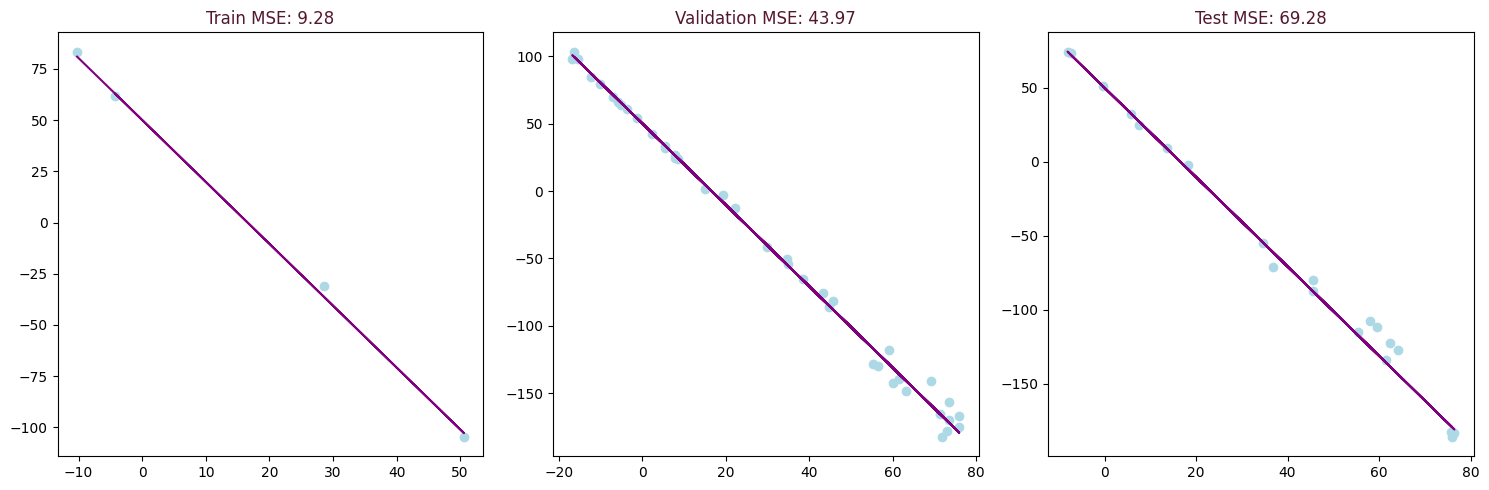

In [484]:
# Create subplots: 1 row, 3 columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Train subplot
axs[0].scatter(X_train, y_train, color="lightblue", label="Train")
axs[0].plot(X_train, model.predict(X_train), color="purple", label="Model")
axs[0].set_title(f"Train MSE: {mse_train:.2f}", color='#541730')

# Validation subplot
axs[1].scatter(X_validation, y_validation, color="lightblue", label="Validation")
axs[1].plot(X_validation, model.predict(X_validation), color="purple", label="Model")
axs[1].set_title(f"Validation MSE: {mse_validation:.2f}", color='#541730')


# Test subplot
axs[2].scatter(X_test, y_test, color="lightblue", label="Test")
axs[2].plot(X_test, model.predict(X_test), color="purple", label="Model")
axs[2].set_title(f"Test MSE: {mse_test:.2f}", color='#541730')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

## **Comparación**

Como esperábamos, el modelo con 4 muestras mejoró los resultados ya que ahora el puede generalizar mucho mejor. Su mejora se evidencia ya que el nuevo modelo tiene un MSE más bajo para el conjunto de entrenamiento, un MSE más bajo para el conjunto de validación y un MSE más bajo para el conjunto de prueba.